# 04.Self Oil Station Price Analysis

## 1. selenium 개요
### 1) selenium 이란?
- 직접 웹브라우저를 이용해서 데이터를 수집
- BeautifulSoup 대신 사용하는 이유
    - 접근 할 웹 주소를 알 수 없을 때
    - 자바 스크립트를 사용하는 웹페이지 (=동적 웹페이지)
    - 웹 브라우저로 접근해야만 할 때
### 2) selenium 설치
- conda install selenium
- 4.6 버전 이후 드라이버 설치 및 경로 지정 불필요
- ChromeDriver 설치
  - https://chromedriver.chromium.org/downloads
    - 115 이상의 버전의 경우, Chrome에서 다운로드 받음 (크로니움과 합쳐짐)
  - Chrome 버전 확인 후 다운로드

In [ ]:
### selenium 설치 확인
from selenium import webdriver
### 셀레니움 객체 생성
driver = webdriver.Chrome()
driver.get("https://wikidocs.net/137914")
### 창 닫기
driver.quit()

## 2. selenium 기초
### 1) 웹 페이지 열기
- webdriver.Chrome() : 크롬 브라우저를 열기 위한 객체 생성
- get("웹페이지") : 웹페이지 열기
- quit() : 브라우저 닫기

\* 리소스가 낭비 되지 않도록 계속 quit()를 호출하여 브라우저를 닫아주는 것이 좋음

In [8]:
### selenium 설치 확인
from selenium import webdriver
### 셀레니움 객체 생성
driver = webdriver.Chrome()
driver.get("https://www.naver.com")

### 창 닫기
driver.quit()

### 2) 웹페이지 조작
- driver.maximize_window() : 브라우저 창 최대화
- driver.minimize_window() : 브라우저 창 최소화
- driver.set_window_size(width, height) : 브라우저 창 크기 조정
    - selenium에서 원하는 태그를 가져오려면 브라우저에서 보여야 함
- driver.refresh() : 현재 페이지 새로고침
- driver.back() : 이전 페이지로 이동
- driver.forward() : 다음 페이지로 이동

In [36]:
from selenium import webdriver
### 셀레니움 객체 생성
driver = webdriver.Chrome()
driver.get("https://pinkwink.kr/")

### 브라우저 창 최대화
driver.maximize_window()

### 브라우저 창 최소화
driver.minimize_window()

### 브라우저 창 크기 조정
driver.set_window_size(800, 600)

### 현재 페이지 새로고침
driver.refresh()

### 이전 페이지로 이동
driver.back()

### 다음 페이지로 이동
driver.forward()

In [35]:
### 창 닫기
driver.quit()

### 3) 웹페이지 요소 찾기
- find_element : 단일 요소 찾기
    - 파라미터 :
        - by : 어떤걸 기준으로 찾을 것인지
                - By.ID
                - By.CLASS_NAME
                - By.NAME
                - By.TAG_NAME
                - By.CSS_SELECTOR
                        - CSS 선택자를 이용하여 요소를 찾음
                        - # : 아이디 선택자
                        - > : 하위 선택자
                        - : : 클래스 선택자
        - value : 어떤 값을 찾을 것인지
- driver.close() : 탭 닫기

In [21]:
from selenium.webdriver.common.by import By
### 클릭을 위한 CSS 요소 확인
first_contents=driver.find_element(by=By.CSS_SELECTOR,value="#content > div.cover-masonry > div > ul > li:nth-child(1)")
first_contents.click()

### 4) 탭 조작
- driver.execute_script() : 자바스크립트 코드를 실행
- "window.open('URL');" : 새로운 탭에서 URL 열기
- "window.open('about:blank', '_blank');" : 빈 탭 열기
- switch_to.window() : 특정 탭으로 전환
    - 파라미터 : 탭의 이름 또는 핸들

In [24]:
### 새로운 탭 만들기
### 자바 스크립트 코드를 실행
driver.execute_script("window.open('https://pinkwink.kr/');")

### 탭 이동 - n번째 탭으로 이동
### 내기 다룰 수 있는 탭 보다 큰 수가 들어오면 에러
driver.switch_to.window(driver.window_handles[1])

### 탭 닫기
driver.close()

### 5) 페이지 스크롤
- driver.execute_script("return document.body.scrollHeight;") : 페이지 전체 높이 가져오기
- driver.execute_script("window.scrollTo(0, 위치)") : 페이지 스크롤
    - 하단 이동 : `window.scrollTo(0, document.body.scrollHeight)`
    - 상단 이동 : `window.scrollTo(0, 0)`
    - 특정 위치 이동
        - ActionChains 이용  : ActionChains 객체 생성 : `ActionChains(driver)`
        - 이동 : `action.movere_to_element(태그).perform()`

In [32]:
### 페이지 전체 높이 가져오기
driver.execute_script("return document.body.scrollHeight")

### 페이지 스크롤 (0에서 가장 아래 까지)
driver.execute_script("window.scrollTo(0, document.body.scrollHeight)")

### 현재 보이는 화면 스크린 저장
driver.save_screenshot("../../data/04.Oil_Price_Analysis/last_height.png")

### 상단으로 이동
driver.execute_script("window.scrollTo(0, 0)")

In [41]:
### 특정 태그 지점까지 스크롤
from selenium.webdriver import ActionChains
#### 요소 확인하기
some_tag = driver.find_element(By.CSS_SELECTOR, "#content > div.cover-list > div > ul")
action = ActionChains(driver)
action.move_to_element(some_tag).perform()

In [42]:
driver.quit()

b### 6) 검색어 입력

- CSS_SELECTOR

In [55]:
from selenium import webdriver
from selenium.webdriver.common.by import By

### 셀레니움 객체 생성
driver = webdriver.Chrome()
driver.get("https://www.naver.com")

In [56]:
### 검색창에 검색어 입력
keyword = driver.find_element(By.CSS_SELECTOR,"#query")
keyword.send_keys("셀레니움")

### 검색 버튼 클릭
search_button = driver.find_element(By.CSS_SELECTOR,"#search-btn")
search_button.click()

- xpath
`// ` : 최상위
`*` : 자손 태그
`/` : 자식 태그
`div[1]` : 첫번째 div 태그
`@id` : id 속성

In [57]:
driver.find_element(By.XPATH,'//*[@id="query"]').send_keys("셀레니움")

In [59]:
driver.find_element(By.XPATH,'//*[@id="search-btn"]').click()

In [60]:
driver.quit()

#### 블로그에서 검색 실행

In [65]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver import ActionChains

driver = webdriver.Chrome()
driver.get("https://pinkwink.kr/")

### 검색 버튼 클릭 - 검색 바 활성화
### 일반적인 방법으로토는 클릭이 되지 않음
#driver.find_element(By.CSS_SELECTOR,"#header > div.search.on").click()

### ActionChains 이용해서 클릭
search_tag = driver.find_element(By.CSS_SELECTOR,".search")
action = ActionChains(driver)
action.click(search_tag)
action.perform()

### 검색어 입력
driver.find_element(By.CSS_SELECTOR,"#header > div.search.on > input[type=text]").send_keys("딥러닝")

### 검색 버튼 클릭
driver.find_element(By.CSS_SELECTOR,"#header > div.search.on > button").click()

In [66]:
driver.quit()

## 3. selenium과 BeautifulSoup 함께 사용하기
- driver.page_source : 현재 페이지의 HTML 소스 가져오기

In [70]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver import ActionChains

driver = webdriver.Chrome()
driver.get("https://pinkwink.kr/")

### 현재 페이지의 html 소스 구하기
driver.page_source

'<html lang="ko" data-phocus-theme="dark"><head><script src="https://pagead2.googlesyndication.com/pagead/managed/js/adsense/m202506030101/reactive_library_fy2021.js?bust=31092849"></script><script src="https://pagead2.googlesyndication.com/pagead/managed/js/adsense/m202506030101/show_ads_impl_fy2021.js?bust=31092849"></script>\n                <script type="text/javascript">if (!window.T) { window.T = {} }\nwindow.T.config = {"TOP_SSL_URL":"https://www.tistory.com","PREVIEW":false,"ROLE":"guest","PREV_PAGE":"","NEXT_PAGE":"","BLOG":{"id":371175,"name":"pinkwink","title":"PinkWink","isDormancy":false,"nickName":"PinkWink","status":"open","profileStatus":"normal"},"NEED_COMMENT_LOGIN":false,"COMMENT_LOGIN_CONFIRM_MESSAGE":"","LOGIN_URL":"https://www.tistory.com/auth/login/?redirectUrl=https://pinkwink.kr/","DEFAULT_URL":"https://pinkwink.kr","USER":{"name":null,"homepage":null,"id":0,"profileImage":null},"SUBSCRIPTION":{"status":"none","isConnected":false,"isPending":false,"isWait":fals

- 가져온 소스를 통해 수집 진행

In [71]:
from bs4 import BeautifulSoup

### html 소스 가져오기
req = driver.page_source

### BeautifulSoup 객체 생성
soup = BeautifulSoup(req, "html.parser")
print(soup.prettify())

<html data-phocus-theme="dark" lang="ko">
 <head>
  <script src="https://pagead2.googlesyndication.com/pagead/managed/js/adsense/m202506030101/reactive_library_fy2021.js?bust=31092849">
  </script>
  <script src="https://pagead2.googlesyndication.com/pagead/managed/js/adsense/m202506030101/show_ads_impl_fy2021.js?bust=31092849">
  </script>
  <script type="text/javascript">
   if (!window.T) { window.T = {} }
window.T.config = {"TOP_SSL_URL":"https://www.tistory.com","PREVIEW":false,"ROLE":"guest","PREV_PAGE":"","NEXT_PAGE":"","BLOG":{"id":371175,"name":"pinkwink","title":"PinkWink","isDormancy":false,"nickName":"PinkWink","status":"open","profileStatus":"normal"},"NEED_COMMENT_LOGIN":false,"COMMENT_LOGIN_CONFIRM_MESSAGE":"","LOGIN_URL":"https://www.tistory.com/auth/login/?redirectUrl=https://pinkwink.kr/","DEFAULT_URL":"https://pinkwink.kr","USER":{"name":null,"homepage":null,"id":0,"profileImage":null},"SUBSCRIPTION":{"status":"none","isConnected":false,"isPending":false,"isWait":fal

In [79]:
### soup 객체를 통해 원하는 데이터 추출
soup.select(".title")

[<span class="title">Ubuntu가 설치된 Raspberry Pi 5에 picamera 설치하기</span>,
 <span class="title">라즈베리파이 VNC 설정 - tightvnc server -</span>,
 <span class="title">ROS2 교육 유데미 유료 교육을 오픈했습니다.</span>,
 <span class="title">ROS2 무료 강의 R2R 응용편이 끝났습니다.</span>,
 <span class="title">ROS2에서 ros domain id를 터미널 프롬프트에 표현하기</span>,
 <span class="title">제로베이스 수강생 프로젝트 소개 - 금 시세 분석</span>,
 <span class="title">circuito.io 아두이노 주변 회로를 손쉽게 확인하기</span>,
 <span class="title">[회로이론] RC 회로</span>,
 <span class="title">Bode Plot의 기초 중에서도 기초이야기</span>,
 <span class="title">Python으로 수행하는 주파수 분석 - FFT, STFT</span>,
 <span class="title">Raspberry Pi 5에 Ubuntu 24.04 설치하고 ssh 서버 설정하기</span>,
 <span class="title">맥 M1/M2/M3 에서 python 아나콘다 설치하고, VSCode에서 환경 설정</span>,
 <span class="title">Ubuntu가 설치된 Raspberry Pi 5에 picamera 설치하기</span>,
 <span class="title">[MATLAB 연재] 12. GUI 시작하기</span>,
 <span class="title">영상 인식에 필요한 기초 기법 간편 정리 - ArUCo Marker, YOLO 등</span>,
 <span class="title">핑크랩이 문제풀이 학습 시장용 유사문제 찾기 알고리즘에 도전합니다.</

In [82]:
### 데이터 수집
contents = soup.select(".title")
contents[2], len(contents)

(<span class="title">ROS2 교육 유데미 유료 교육을 오픈했습니다.</span>, 38)

## 4. selenium을 이용한 데이터 수집 실습 - 셀프 주유소 가격 분석
### 1) 주유소 가격 확인 사이트 분석
- https://www.opinet.co.kr/searRgSelect.do
- 목표 데이터
    - 브랜드
    - 가격
    - 셀프 주유 여부
    - 위치

### 2) 셀레니움으로 데이터 수집하기
#### 문제 발생
  - 해당 URL로 바로 접속 X (메인 페이지로 이동됨)
  - 팝업창 발생 : `driver.switch_to.window(driver.window_handle[-1]`로 팝업창 닫기
  - 스크립트가 종료되면 창이 알아서 종료됨
        - `options = webdriver.ChromeOptions() ; options.add_experimental_option("detach", True)`
        - 후에 `driver = webdriver.Chrome(options=options)`

In [129]:
### 셀레니움 객체 생성
from selenium import webdriver
import time

options = webdriver.ChromeOptions()
options.add_experimental_option("detach", True)
url = "https://www.opinet.co.kr/searRgSelect.do"
driver = webdriver.Chrome(options=options)
driver.get(url)

def get_mainPage():
    options = webdriver.ChromeOptions()
    options.add_experimental_option("detach", True)
    url = "https://www.opinet.co.kr/searRgSelect.do"
    driver = webdriver.Chrome(options=options)
    driver.get(url)

    ### 팝업창 전환 후 닫기
    ### 가장 마지막에 열린 팝업창으로 전환
    #driver.switch_to.window(driver.window_handles[-1])
    #driver.close()
    #time.sleep(3)

    ### 팝업창 닫은 후 다시 메인 페이지로 전환
    #driver.switch_to.window(driver.window_handles[-1])
    ### 접근 페이지 다시 요청
    #driver.get(url)
    #time.sleep(3)


### 3) 셀레니움으로 데이터 수집하기
- 지역 : 시/도 데이터 선택하기
- id : SIDO_NM0
- 주의 : find_element_by_id()는 더 이상 사용되지 않음

In [130]:
sido_list_raw =driver.find_element(By.ID, "SIDO_NM0")
sido_list_raw.text

'            시/도\n            \n             \n              서울\n             \n             \n            \n             \n             \n              부산\n             \n            \n             \n             \n              대구\n             \n            \n             \n             \n              인천\n             \n            \n             \n             \n              광주\n             \n            \n             \n             \n              대전\n             \n            \n             \n             \n              울산\n             \n            \n             \n             \n              세종\n             \n            \n             \n             \n              경기\n             \n            \n             \n             \n              강원\n             \n            \n             \n             \n              충북\n             \n            \n             \n             \n              충남\n             \n            \n             \n             \n              

In [131]:
sido_list=sido_list_raw.find_elements(By.TAG_NAME,"option")
len(sido_list),sido_list[2].text

(18, '부산')

In [120]:
sido_list[1].get_attribute("value")

'서울특별시'

In [132]:
#### 시도 리스트 가져오기
sido_names=[]
#### 시도 리스트 가져오기  -  한줄로 작성 하기
sido_names = [i.get_attribute("value") for i in sido_list]
#for i in sido_list:
#    sido_names.append(i.get_attribute("value"))

 # 첫번째 값은 빈값 - 제거
sido_names = sido_names[1:]

In [134]:
sido_names[:5]

['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시']

#### send_keys()를 이용해서 시도 선택하기

In [135]:
sido_list_raw.send_keys(sido_names[15])

#### 구 데이터 수집 하기
- 시도와 동일

In [136]:
gu_list_raw = driver.find_element(By.ID, "SIGUNGU_NM0")
gu_list = gu_list_raw.find_elements(By.TAG_NAME,"option")
gu_names = [i.get_attribute("value") for i in gu_list]
gu_names = gu_names[1:]
gu_names[:5],len(gu_names)

(['가평군', '고양시', '고양시덕양구', '고양시일산동구', '고양시일산서구'], 51)

In [137]:
gu_list_raw.send_keys(gu_names[15])

#### 엑셀 데이터 저장 하기

In [138]:
driver.find_element(By.CSS_SELECTOR, "#templ_list0 > div:nth-child(7) > div > a").click()

In [141]:
import time
from tqdm.notebook import tqdm

for gu in tqdm(gu_names):
    element = driver.find_element(By.ID, "SIGUNGU_NM0")
    element.send_keys(gu)
    time.sleep(3)

    element_get_excel = driver.find_element(By.CSS_SELECTOR, "#templ_list0 > div:nth-child(7) > div > a").click()
    time.sleep(3)


  0%|          | 0/51 [00:00<?, ?it/s]

In [1]:
driver.close()

NameError: name 'driver' is not defined

### 4) 데이터 정리하기
- glob을 이용해 데이터 정리

In [2]:
import pandas as pd
from  glob import glob

- glob을 이용해 파일 목록 한 번에 불러오기
file_list = glob("../../data/04.Oil_Price_Analysis/*.xls")

In [5]:
station_files=glob("../../data/04.Oil_Price_Analysis/지역*.xls")
station_files[:5]

['../../data/04.Oil_Price_Analysis\\지역_위치별(주유소) (1).xls',
 '../../data/04.Oil_Price_Analysis\\지역_위치별(주유소) (10).xls',
 '../../data/04.Oil_Price_Analysis\\지역_위치별(주유소) (11).xls',
 '../../data/04.Oil_Price_Analysis\\지역_위치별(주유소) (12).xls',
 '../../data/04.Oil_Price_Analysis\\지역_위치별(주유소) (13).xls']

In [6]:
### 테스트로 데이터 하나 읽어오기
tmp = pd.read_excel(station_files[0], header=2)
tmp.head(3)

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,경기도,덕양주유소,경기 고양시 덕양구 충장로 142 (행신동),알뜰주유소,031-979-8426,Y,-,1548,1408,-
1,경기도,(주)어울림주유소,경기 고양시 덕양구 충장로 407,알뜰주유소,031-967-5145,Y,-,1548,1408,-
2,경기도,KH에너지㈜직영 가나주유소,경기 고양시 덕양구 호국로 1941 (벽제동),SK에너지,031-962-1541,Y,-,1548,1408,-


In [8]:
tmp_raw = []
for file_name in station_files:
    tmp = pd.read_excel(file_name, header=2)
    tmp_raw.append(tmp)

tmp_raw

[      지역                상호                          주소        상표  \
 0    경기도             덕양주유소    경기 고양시 덕양구 충장로 142 (행신동)     알뜰주유소   
 1    경기도         (주)어울림주유소          경기 고양시 덕양구 충장로 407     알뜰주유소   
 2    경기도    KH에너지㈜직영 가나주유소   경기 고양시 덕양구 호국로 1941 (벽제동)     SK에너지   
 3    경기도  (주)디오티디 고양용가리주유소         경기 고양시 일산동구 백마로 590  HD현대오일뱅크   
 4    경기도            개나리주유소    경기 고양시 덕양구 보광로 126 (벽제동)     알뜰주유소   
 ..   ...               ...                         ...       ...   
 125  경기도             삼일주유소  경기 고양시 일산동구 견달산로 252 (식사동)     SK에너지   
 126  경기도       GS칼텍스 상암주유소     경기 고양시 덕양구 자유로 38 (덕은동)     GS칼텍스   
 127  경기도             행신주유소     경기 고양시 덕양구 중앙로 394(행신동)     SK에너지   
 128  경기도            오렌지주유소    경기 고양시 일산동구 백마로 49 (장항동)     GS칼텍스   
 129  경기도    남선석유(주)성현셀프주유소    경기 고양시 일산동구 성현로 78 (성석동)     S-OIL   
 
              전화번호 셀프여부 고급휘발유   휘발유    경유  실내등유  
 0    031-979-8426    Y     -  1548  1408     -  
 1    031-967-5145    Y     -  1548  1408     -  
 2    031-962-1541  

- 형식이 동일하고 연달아 붙이기만 하면 될때는 concat

In [10]:
station_raw = pd.concat(tmp_raw)
station_raw

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,경기도,덕양주유소,경기 고양시 덕양구 충장로 142 (행신동),알뜰주유소,031-979-8426,Y,-,1548,1408,-
1,경기도,(주)어울림주유소,경기 고양시 덕양구 충장로 407,알뜰주유소,031-967-5145,Y,-,1548,1408,-
2,경기도,KH에너지㈜직영 가나주유소,경기 고양시 덕양구 호국로 1941 (벽제동),SK에너지,031-962-1541,Y,-,1548,1408,-
3,경기도,(주)디오티디 고양용가리주유소,경기 고양시 일산동구 백마로 590,HD현대오일뱅크,031-994-5185,Y,1748,1548,1408,-
4,경기도,개나리주유소,경기 고양시 덕양구 보광로 126 (벽제동),알뜰주유소,031-962-5545,Y,-,1548,1408,-
...,...,...,...,...,...,...,...,...,...,...
38,경기도,현리주유소,경기 가평군 하면 현창로 64,SK에너지,031-585-0236,N,-,1750,1630,1300
39,경기도,지에스칼텍스㈜ 설악IC주유소,경기 가평군 설악면 유명로 1619,GS칼텍스,031-585-5129,Y,1952,1753,1619,1300
40,경기도,가평설악주유소,경기 가평군 설악면 신천중앙로 30,SK에너지,031-585-5140,Y,-,1763,1647,1300
41,경기도,SK에너지(주) 청평주유소,경기 가평군 청평면 구청평로 89,SK에너지,031-584-0055,N,1899,1775,1654,1290


In [11]:
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2848 entries, 0 to 42
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      2848 non-null   object
 1   상호      2848 non-null   object
 2   주소      2848 non-null   object
 3   상표      2848 non-null   object
 4   전화번호    2848 non-null   object
 5   셀프여부    2848 non-null   object
 6   고급휘발유   2848 non-null   object
 7   휘발유     2848 non-null   object
 8   경유      2848 non-null   object
 9   실내등유    2848 non-null   object
dtypes: object(10)
memory usage: 244.8+ KB


In [13]:
stations = pd.DataFrame(
    {
        "상호":station_raw["상호"],
        "주소": station_raw["주소"],
        "가격": station_raw["휘발유"],
        "셀프": station_raw["셀프여부"],
        "상표": station_raw["상표"],
    }
)
stations.head(3)

,상호,주소,가격,셀프,상표
0,덕양주유소,경기 고양시 덕양구 충장로 142 (행신동),1548,Y,알뜰주유소
1,(주)어울림주유소,경기 고양시 덕양구 충장로 407,1548,Y,알뜰주유소
2,KH에너지㈜직영 가나주유소,경기 고양시 덕양구 호국로 1941 (벽제동),1548,Y,SK에너지


In [15]:
stations["구"] = [eachAddress.split()[1] for eachAddress in stations["주소"]]
stations

,상호,주소,가격,셀프,상표,구
0,덕양주유소,경기 고양시 덕양구 충장로 142 (행신동),1548,Y,알뜰주유소,고양시
1,(주)어울림주유소,경기 고양시 덕양구 충장로 407,1548,Y,알뜰주유소,고양시
2,KH에너지㈜직영 가나주유소,경기 고양시 덕양구 호국로 1941 (벽제동),1548,Y,SK에너지,고양시
3,(주)디오티디 고양용가리주유소,경기 고양시 일산동구 백마로 590,1548,Y,HD현대오일뱅크,고양시
4,개나리주유소,경기 고양시 덕양구 보광로 126 (벽제동),1548,Y,알뜰주유소,고양시
...,...,...,...,...,...,...
38,현리주유소,경기 가평군 하면 현창로 64,1750,N,SK에너지,가평군
39,지에스칼텍스㈜ 설악IC주유소,경기 가평군 설악면 유명로 1619,1753,Y,GS칼텍스,가평군
40,가평설악주유소,경기 가평군 설악면 신천중앙로 30,1763,Y,SK에너지,가평군
41,SK에너지(주) 청평주유소,경기 가평군 청평면 구청평로 89,1775,N,SK에너지,가평군


- 가격 데이터형의 변황 object => float
- 빈 값이 있기 때문에 에러 발생

In [16]:
stations[stations["가격"]=="-"]

,상호,주소,가격,셀프,상표,구
129,남선석유(주)성현셀프주유소,경기 고양시 일산동구 성현로 78 (성석동),-,Y,S-OIL,고양시
98,sk장승주유소,경기 남양주시 진접읍 금강로 1590,-,N,SK에너지,남양주시
48,역곡WASH주유소,경기 부천시 부일로 829,-,Y,S-OIL,부천시
18,역곡WASH주유소,경기 부천시 부일로 829,-,Y,S-OIL,부천시
54,KH에너지㈜직영 판교운중주유소,경기 성남시 분당구 동판교로 177 (삼평동),-,N,SK에너지,성남시
55,HD현대오일뱅크㈜직영 지알씨주유소,경기 성남시 분당구 성남대로407번길 13,-,N,HD현대오일뱅크,성남시
22,HD현대오일뱅크㈜직영 지알씨주유소,경기 성남시 분당구 성남대로407번길 13,-,N,HD현대오일뱅크,성남시
23,KH에너지㈜직영 판교운중주유소,경기 성남시 분당구 동판교로 177 (삼평동),-,N,SK에너지,성남시
81,SK에너지(주) 시흥주유소,경기 시흥시 수인로 3380 (신천동),-,Y,SK에너지,시흥시
82,대야동주유소,경기 시흥시 복지로 68,-,Y,알뜰주유소,시흥시


#### 가격 정보가 있는 주유소만을 사용

In [22]:
stations=stations[stations["가격"]!="-"]
stations.tail(3)

,상호,주소,가격,셀프,상표,구
39,지에스칼텍스㈜ 설악IC주유소,경기 가평군 설악면 유명로 1619,1753,Y,GS칼텍스,가평군
40,가평설악주유소,경기 가평군 설악면 신천중앙로 30,1763,Y,SK에너지,가평군
41,SK에너지(주) 청평주유소,경기 가평군 청평면 구청평로 89,1775,N,SK에너지,가평군


In [23]:
stations["가격"] = stations["가격"].astype(float)

C:\Users\skssk\AppData\Local\Temp\ipykernel_28300\2012659169.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stations["가격"] = stations["가격"].astype(float)


In [24]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2815 entries, 0 to 41
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   상호      2815 non-null   object 
 1   주소      2815 non-null   object 
 2   가격      2815 non-null   float64
 3   셀프      2815 non-null   object 
 4   상표      2815 non-null   object 
 5   구       2815 non-null   object 
dtypes: float64(1), object(5)
memory usage: 153.9+ KB


#### 인덱스 재정렬

In [29]:
stations.reset_index(inplace=True)

ValueError: cannot insert level_0, already exists

In [33]:
del stations["index"]
del stations["level_0"]
stations.head()

,상호,주소,가격,셀프,상표,구
0,덕양주유소,경기 고양시 덕양구 충장로 142 (행신동),1548.0,Y,알뜰주유소,고양시
1,(주)어울림주유소,경기 고양시 덕양구 충장로 407,1548.0,Y,알뜰주유소,고양시
2,KH에너지㈜직영 가나주유소,경기 고양시 덕양구 호국로 1941 (벽제동),1548.0,Y,SK에너지,고양시
3,(주)디오티디 고양용가리주유소,경기 고양시 일산동구 백마로 590,1548.0,Y,HD현대오일뱅크,고양시
4,개나리주유소,경기 고양시 덕양구 보광로 126 (벽제동),1548.0,Y,알뜰주유소,고양시


## 5, 주유소 가격 정보 시각화

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import platform
from matplotlib import font_manager, rc

### 인라인 설정
get_ipython().run_line_magic("matplotlib", "inline")

### 폰트 설정
if platform.system() == "Darwin":  # Mac
    rc("font", family="AppleGothic")
else:  # Windows
    path = "C:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc("font", family=font_name)


<Axes: title={'center': '가격'}, xlabel='셀프'>

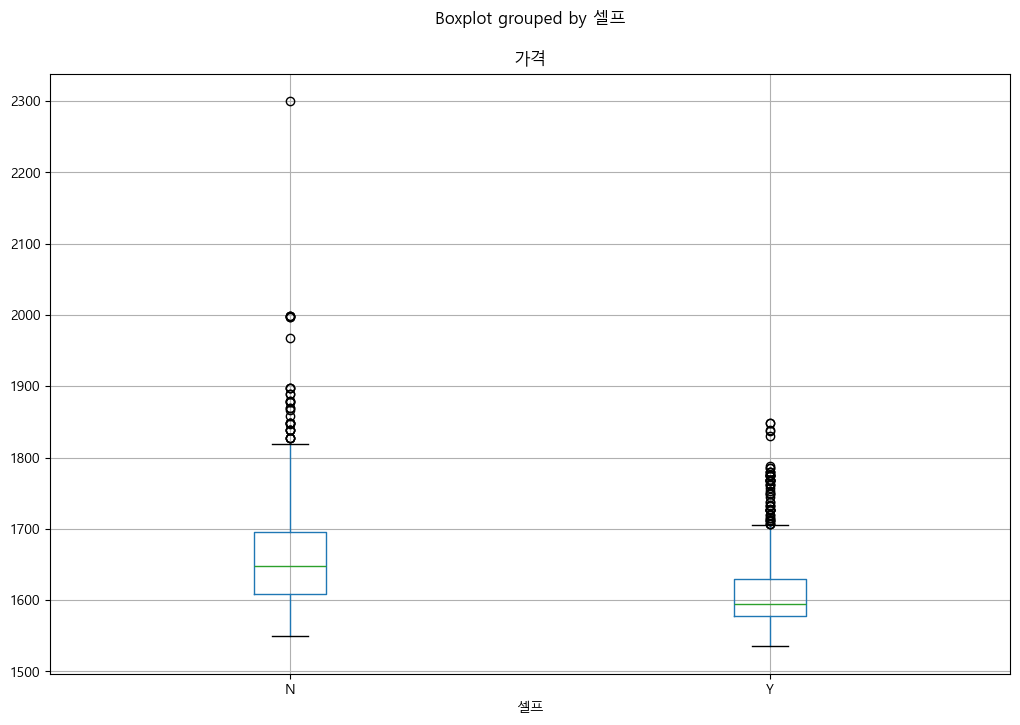

In [36]:
#### boxplot
stations.boxplot(column="가격", by="셀프", figsize=(12, 8))

C:\Users\skssk\AppData\Local\Temp\ipykernel_28300\2670120327.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="셀프", y="가격", data=stations, palette="Set3")


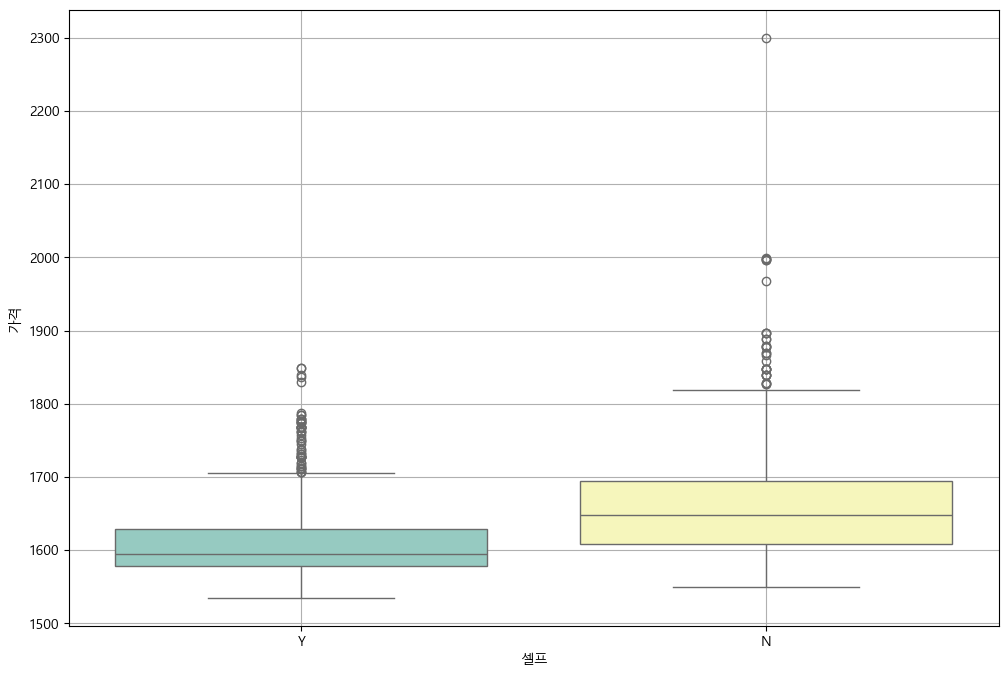

In [37]:
#### seaborn의 boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x="셀프", y="가격", data=stations, palette="Set3")
plt.grid(True)
plt.show()

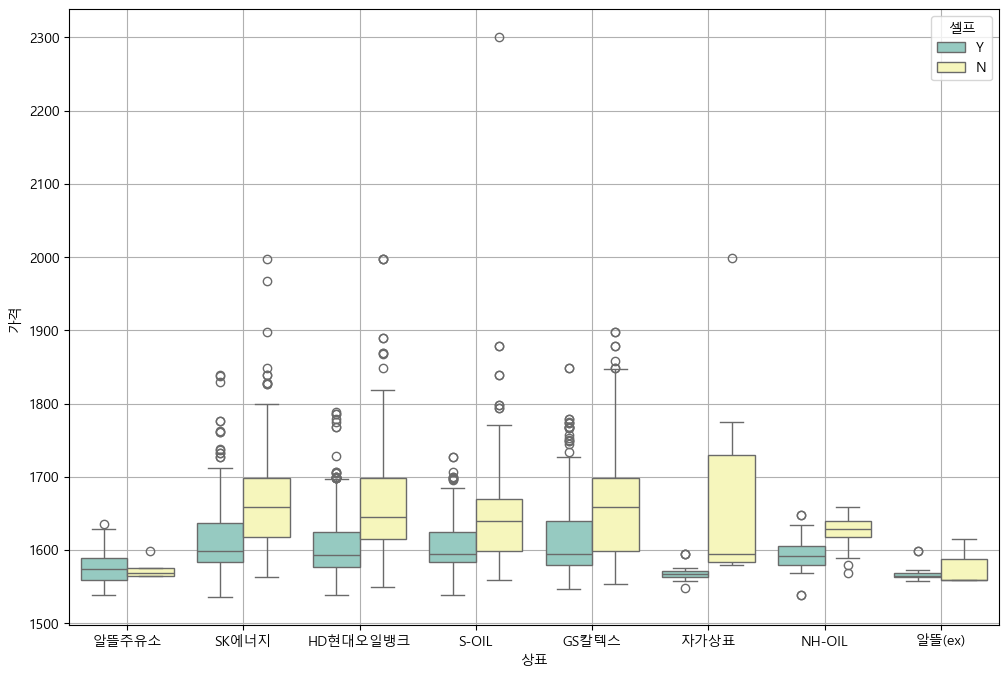

In [39]:
#### boxplot - seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(x="상표", y="가격", hue="셀프", data=stations, palette="Set3")
plt.grid(True)
plt.show()

In [40]:
### 지도 시각화

In [41]:
import json
import folium
import warnings

### 경고 메시지 무시
warnings.simplefilter(action="ignore", category=FutureWarning)

In [44]:
### 가장 비싼 주유소 10개
stations.sort_values(by=["가격"], ascending=False).head(10)
### 가장 싼 주유소 10개
stations.sort_values(by=["가격"], ascending=True).head(10)

,상호,주소,가격,셀프,상표,구
2410,SK에너지(주) 서해로셀프주유소,경기 화성시 팔탄면 서해로 962,1535.0,Y,SK에너지,화성시
1142,안양원예농업협동조합주유소,경기도 안양시 만안구 오리로 60,1539.0,Y,NH-OIL,안양시
2411,대원주유소,경기 화성시 팔탄면 서해로 1322-3,1539.0,Y,S-OIL,화성시
2412,이케이에너지㈜ 광차주유소,경기 화성시 팔탄면 서해로 1266,1539.0,Y,HD현대오일뱅크,화성시
781,무지내주유소,경기 시흥시 금오로 144 (무지내동),1539.0,Y,알뜰주유소,시흥시
1198,안양원예농업협동조합주유소,경기도 안양시 만안구 오리로 60,1539.0,Y,NH-OIL,안양시
782,삼성주유소,경기 시흥시 금오로 269 (과림동),1547.0,Y,SK에너지,시흥시
1913,서현주유소,경기 의정부시 호국로 1755 (자일동),1547.0,Y,GS칼텍스,의정부시
129,화곡주유소,경기 김포시 대곶면 대곶북로 347,1547.0,Y,알뜰주유소,김포시
2413,이케이에너지㈜ 화성주유소,경기 화성시 남양읍 화성로 995,1547.0,Y,HD현대오일뱅크,화성시


In [46]:
import numpy as np

gu_data = pd.pivot_table(
    data=stations,
    index="구",
    values="가격",
    aggfunc=np.mean
)
gu_data.head()

,가격
구,
가평군,1666.095238
고양시,1589.689922
과천시,1702.666667
광명시,1624.560000
광주,1605.000000


In [55]:
geo_path = "../../data/04.Oil_Price_Analysis/02. skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path,encoding="utf-8"))
my_map = folium.Map(location=[37.5502,126.982], zoom_start=9, tiles="Stamen Toner")
my_map.choropleth(
    geo_data=geo_str,
    data=gu_data,
    columns=[gu_data.index, "가격"],
    key_on="feature.id",
    fill_color="PuRd"
)
my_map